# Лабораторная работа №3

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
data['score'] = (data['math score'] + data['reading score'] + data['writing score'])/3

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
data['score'].nunique()

194

<Axes: >

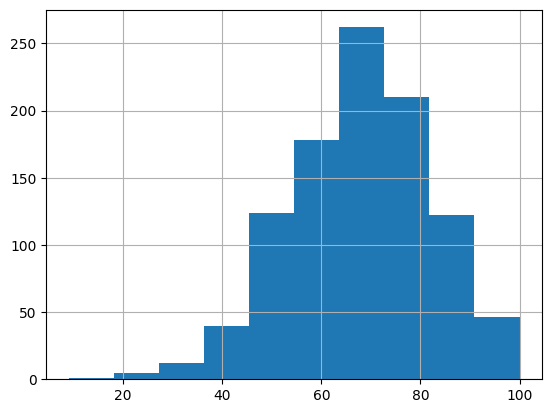

In [10]:
data['score'].hist()

# 2. Задача регрессии

Задача регрессии была выбрана, т.к. в любом случае будет возвращаться значение зависимой переменной score от независимых переменных

# 3. Предобратока данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [11]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

В нашем случае пропусков не обнаружено

In [12]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          72             72             74   
1                          0          69       

In [13]:
data.dtypes

gender                           int32
race/ethnicity                   int32
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                       int64
reading score                    int64
writing score                    int64
score                          float64
dtype: object

In [14]:
data['reading score'] = data['reading score'].astype('int32')
data['writing score'] = data['writing score'].astype('int32')
data['math score'] = data['reading score'].astype('int32')
data['score'] = data['reading score'].astype('int32')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int32
 1   race/ethnicity               1000 non-null   int32
 2   parental level of education  1000 non-null   int32
 3   lunch                        1000 non-null   int32
 4   test preparation course      1000 non-null   int32
 5   math score                   1000 non-null   int32
 6   reading score                1000 non-null   int32
 7   writing score                1000 non-null   int32
 8   score                        1000 non-null   int32
dtypes: int32(9)
memory usage: 35.3 KB


In [16]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,0,1,1,1,1,72,72,74,72
1,0,2,4,1,0,90,90,88,90
2,0,1,3,1,1,95,95,93,95
3,1,0,0,0,1,57,57,44,57
4,1,2,4,1,1,78,78,75,78


### C. Нормирование численных переменных датасета

In [17]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['math score', 'reading score', 'writing score', 'score']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,math score,reading score,writing score,score
0,0.662651,0.662651,0.711111,0.662651
1,0.879518,0.879518,0.866667,0.879518
2,0.939759,0.939759,0.922222,0.939759
3,0.481928,0.481928,0.377778,0.481928
4,0.734940,0.734940,0.722222,0.734940


### A. Разделение выборки на тестовую и тренировочную 

In [18]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,0.628542,0.628542,0.645044,0.628542
std,0.499926,1.157179,1.829522,0.478753,0.479652,0.175906,0.175906,0.168841,0.175906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.506024,0.506024,0.530556,0.506024
50%,0.000000,2.000000,2.000000,1.000000,1.000000,0.638554,0.638554,0.655556,0.638554
75%,1.000000,3.000000,4.000000,1.000000,1.000000,0.746988,0.746988,0.766667,0.746988
max,1.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = data.drop(columns=['score'])
y = data['score']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Обучение на тренировочном множестве

### А. Линейная модель

In [22]:
from sklearn.linear_model import LinearRegression

# Создаем сущность линейной модели
linear_model = LinearRegression()

# Train the model on the training dataset
linear_model.fit(X_train, y_train)

LinearRegression()

### B. Деревянная модель

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Создаем список для сохранения значений MSE для каждой глубины дерева
mse_scores = []

# Задаем список глубин деревьев, которые хотим проверить
depths = [3, 5, 7, 10]

# Обучаем модель для каждой глубины дерева и вычисляем MSE
for depth in depths:
    # Создаем экземпляр модели с заданной глубиной дерева
    tree_model = DecisionTreeRegressor(max_depth=depth)
    
    # Обучаем модель на тренировочной выборке
    tree_model.fit(X_train, y_train)
    
    # Предсказываем значения на тестовой выборке
    y_pred = tree_model.predict(X_test)
    
    # Вычисляем MSE и сохраняем его в список
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Выводим значения MSE для каждой глубины дерева
for depth, mse in zip(depths, mse_scores):
    print(f"Глубина: {depth}, MSE: {mse}")

Глубина: 3, MSE: 0.0011999876641444922
Глубина: 5, MSE: 6.84277194623836e-05
Глубина: 7, MSE: 7.983742197706493e-06
Глубина: 10, MSE: 6.0966758600667735e-05


### C. K-ближайших соседей

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 5
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 7
knn_7 = KNeighborsRegressor(n_neighbors=7)
knn_7.fit(X_train, y_train)

# Создание экземпляра класса KNeighborsRegressor с глубиной k = 10
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(X_train, y_train)

import matplotlib.pyplot as plt

# Список для сохранения значений MSE для каждой глубины
mse_scores = []

# Список глубин
depths = [3, 5, 7, 10]

# Перебираем каждую глубину
for depth in depths:
    # Создаем экземпляр модели DecisionTreeRegressor с текущей глубиной
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train, y_train)
    
    # Предсказываем значения для тестовой выборки
    y_pred = tree_model.predict(X_test)
    
    # Вычисляем среднеквадратичную ошибку (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Добавляем значение MSE в список
    mse_scores.append(mse)

# Находим индекс минимального значения MSE
best_depth_index = mse_scores.index(min(mse_scores))

# Выводим наилучшую глубину
best_depth = depths[best_depth_index]
print(f"Лучшая глубина - {best_depth}")


Лучшая глубина - 10


### D. Случайный лес

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# 5. Подсчет метрик на train и test множествах (Задача регрессии)

In [26]:
# Импортируем необходимые модули
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Модель KNeighborsRegressor с n_neighbors=3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)
mae_knn_3 = mean_absolute_error(y_test, y_pred_knn_3)
mse_knn_3 = mean_squared_error(y_test, y_pred_knn_3)
rmse_knn_3 = np.sqrt(mse_knn_3)

# Выводим результаты
print("KNeighborsRegressor (n_neighbors=3):")
print("MAE:", mae_knn_3)
print("MSE:", mse_knn_3)
print("RMSE:", rmse_knn_3)
print()

# Модель LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Выводим результаты
print("LinearRegression:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print()

# Модель RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Выводим результаты
print("RandomForestRegressor:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print()

# Модель DecisionTreeRegressor с max_depth=10
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Выводим результаты
print("DecisionTreeRegressor (максимальная глубина=3):")
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)

KNeighborsRegressor (n_neighbors=3):
MAE: 0.08471887550200805
MSE: 0.014053402364477994
RMSE: 0.11854704705085654

LinearRegression:
MAE: 4.390932062392494e-16
MSE: 2.7324323678988347e-31
RMSE: 5.227267324232456e-16

RandomForestRegressor:
MAE: 0.00035662650602478097
MSE: 3.958049063724842e-06
RMSE: 0.0019894846226409598

DecisionTreeRegressor (максимальная глубина=3):
MAE: 0.027056989061314717
MSE: 0.0011999876641444933
RMSE: 0.03464083809818252


# 6. Сравнение метрик

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создание списка моделей и их метрик
models = [linear_model, knn_3, tree_model, rf_model]
model_names = ['Linear Regression', 'KNN (k=3)', 'Decision Tree', 'Random Forest']
mae_train = []
mae_test = []
mse_train = []
mse_test = []

# Вычисление метрик для каждой модели
for model in models:
    # Предсказание на тренировочных данных
    y_train_pred = model.predict(X_train)
    # Предсказание на тестовых данных
    y_test_pred = model.predict(X_test)
    # Вычисление MAE для тренировочных и тестовых данных
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))
    # Вычисление MSE для тренировочных и тестовых данных
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Вывод результатов
for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"MAE (Train): {mae_train[i]}")
    print(f"MAE (Test): {mae_test[i]}")
    print(f"MSE (Train): {mse_train[i]}")
    print(f"MSE (Test): {mse_test[i]}")
    print()

# Оценка наличия переобучения и недообучения
best_model_index = np.argmin(mae_test)
worst_model_index = np.argmax(mae_test)

print(f"Лучшая модель: {model_names[best_model_index]}")
print(f"Худшая модель: {model_names[worst_model_index]}")


Model: Linear Regression
MAE (Train): 4.365277980006256e-16
MAE (Test): 4.390932062392494e-16
MSE (Train): 2.7770627985380362e-31
MSE (Test): 2.7324323678988347e-31

Model: KNN (k=3)
MAE (Train): 0.05256526104417672
MAE (Test): 0.08471887550200805
MSE (Train): 0.005899844357349075
MSE (Test): 0.014053402364477994

Model: Decision Tree
MAE (Train): 0.02470751832066027
MAE (Test): 0.027056989061314717
MSE (Train): 0.0009684480353769748
MSE (Test): 0.0011999876641444933

Model: Random Forest
MAE (Train): 0.00015165662650667953
MAE (Test): 0.00035662650602478097
MSE (Train): 2.252086659892574e-06
MSE (Test): 3.958049063724842e-06

Лучшая модель: Linear Regression
Худшая модель: KNN (k=3)


In [29]:
# Ответы на вопросы
print(f"1. Лучшая модель: {model_names[best_model_index]}")
print(f"2. Переобучение: {mae_train[best_model_index] > 0.1}")
print(f"3. Недообучение: {abs(mae_train[best_model_index] - mae_test[best_model_index]) > 0.05}")
print(f"4. Для улучшения метрик моделей можно попробовать следующие подходы:")
print("   - Подбор оптимальных гиперпараметров моделей")
print("   - Использование более сложных моделей или ансамблей моделей")
print("   - Увеличение размера обучающей выборки")
print("   - Использование дополнительных признаков или преобразование существующих признаков")

1. Лучшая модель: Linear Regression
2. Переобучение: False
3. Недообучение: False
4. Для улучшения метрик моделей можно попробовать следующие подходы:
   - Подбор оптимальных гиперпараметров моделей
   - Использование более сложных моделей или ансамблей моделей
   - Увеличение размера обучающей выборки
   - Использование дополнительных признаков или преобразование существующих признаков


В данном случае была выбрана модель Linear Regression как самая оптимальная, так же модель обучилась корректно и переобучения или недообучения не наблюдается.